# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## ADDED BELOW ##
#Import the Geoapify API key
#from api_keys import geoapify_key

import random
import json 
from scipy import stats


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 556


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL 

url ="http://api.openweathermap.org/data/2.5/weather?"
units = ("metric")

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (pulls in default temp of Kelvin)
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    #2nd try
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
    

    #print(city_weather_json)
    #print(json.dumps(city_weather_json, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather_json['coord']['lat'])
        city_lng = (city_weather_json['coord']['lon'])
        city_max_temp = (city_weather_json['main']['temp_max'])
        city_humidity = (city_weather_json['main']['humidity'])
        city_clouds = (city_weather_json['clouds']['all'])
        city_wind = (city_weather_json['wind']['speed'])
        city_country = (city_weather_json['sys']['country'])
        city_date = (city_weather_json['dt'])

    #Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | alotau
City not found. Skipping...
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | alaior
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | kailua-kona
Processing Record 17 of Set 1 | bereznik
Processing Record 18 of Set 1 | bardai
Processing Record 19 of Set 1 | nikolayevsk-on-amure
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | bodaybo

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()


City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.42,85,47,5.42,GS,1686513999
1,lihue,21.9789,-159.3672,27.58,72,20,5.66,US,1686513216
2,bredasdorp,-34.5322,20.0403,13.51,88,100,4.22,ZA,1686513967
3,bethel,41.3712,-73.4140,27.05,49,0,4.12,US,1686513804
4,isafjordur,66.0755,-23.1240,9.52,64,12,8.60,IS,1686513999


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.42,85,47,5.42,GS,1686513999
1,lihue,21.9789,-159.3672,27.58,72,20,5.66,US,1686513216
2,bredasdorp,-34.5322,20.0403,13.51,88,100,4.22,ZA,1686513967
3,bethel,41.3712,-73.4140,27.05,49,0,4.12,US,1686513804
4,isafjordur,66.0755,-23.1240,9.52,64,12,8.60,IS,1686513999


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

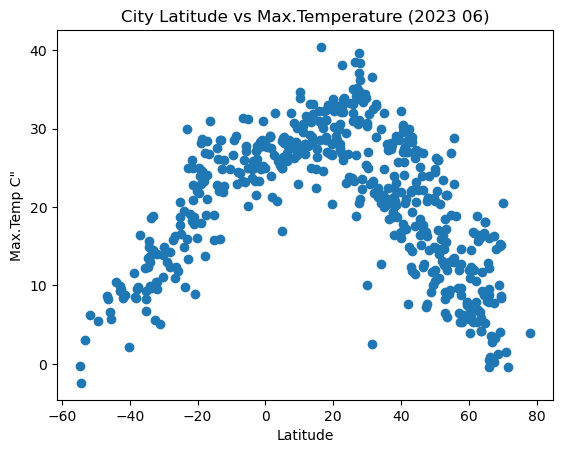

In [9]:
# Build scatter plot for latitude vs. temperature
%matplotlib inline

city_data_df
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.ylabel('Max.Temp C"')
plt.xlabel("Latitude")
plt.title('City Latitude vs Max.Temperature (2023 06)')

# Save the figure
#plt.savefig("output_data/Fig1.png")
plt.savefig("City Latitude vs Max.Temperature (2023 06).png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

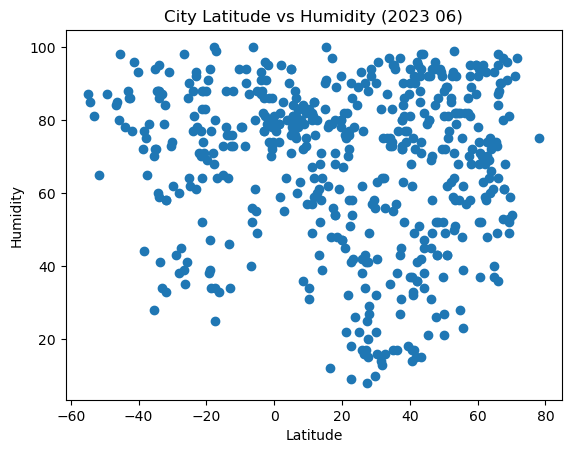

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (2023 06)')

# Save the figure
plt.savefig("City Latitude vs Humidity (2023 06).png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

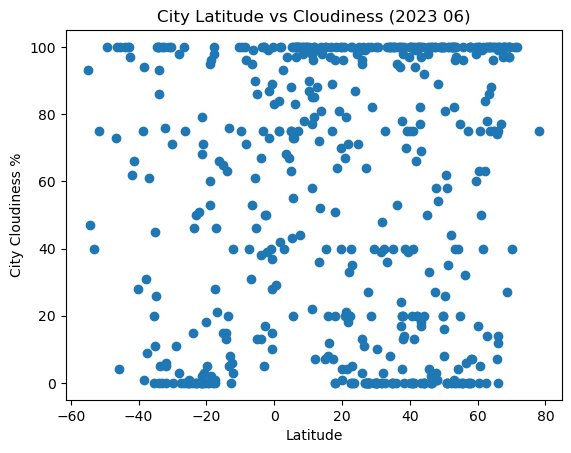

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('City Cloudiness %')
plt.title('City Latitude vs Cloudiness (2023 06)')

# Save the figure
plt.savefig("City Latitude vs Cloudiness (2023 06).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

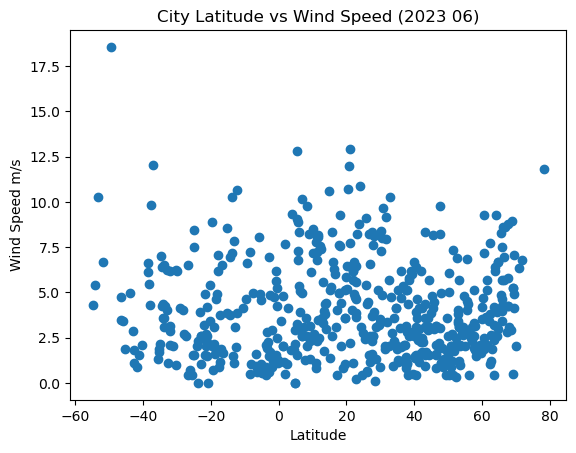

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('City Latitude vs Wind Speed (2023 06)')

# Save the figure
plt.savefig("City Latitude vs Wind Speed (2023 06).png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      4.156990
1      3.945115
2      4.102121
3      3.891236
4      3.822600
         ...   
526    4.066499
527    4.006541
528    3.846407
529    3.923940
530    4.103730
Name: Lat, Length: 531, dtype: float64


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0])
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lihue,21.9789,-159.3672,27.58,72,20,5.66,US,1686513216
3,bethel,41.3712,-73.4140,27.05,49,0,4.12,US,1686513804
4,isafjordur,66.0755,-23.1240,9.52,64,12,8.60,IS,1686513999
5,alaior,39.9303,4.1404,21.86,94,0,2.57,ES,1686513999
8,dudinka,69.4058,86.1778,8.68,49,100,7.07,RU,1686513400
...,...,...,...,...,...,...,...,...,...
522,red chute,32.5560,-93.6132,32.83,56,75,5.66,US,1686514053
523,lishui,28.4604,119.9103,22.28,94,100,0.09,CN,1686514053
524,mhamid,29.8200,-5.7200,33.93,10,0,3.33,MA,1686514053


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.42,85,47,5.42,GS,1686513999
2,bredasdorp,-34.5322,20.0403,13.51,88,100,4.22,ZA,1686513967
6,port-aux-francais,-49.3500,70.2167,5.41,87,100,18.55,TF,1686513852
7,arraial do cabo,-22.9661,-42.0278,29.98,61,0,2.57,BR,1686513419
9,namibe,-15.1961,12.1522,19.03,73,65,3.86,AO,1686513999


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.0x +4.01


The r-value is: 0.5710473075926719


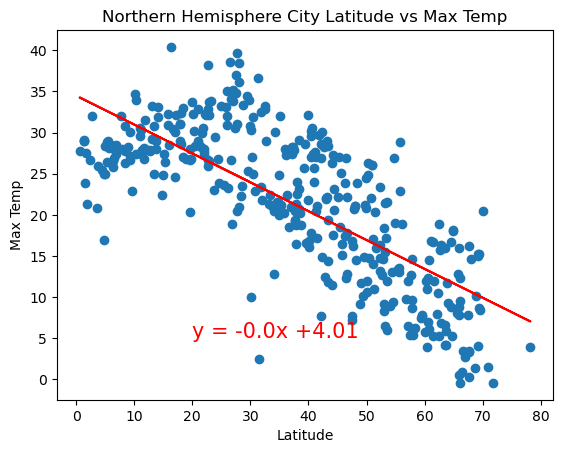

In [17]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#plt.scatter(x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere City Latitude vs Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.7557396571008713


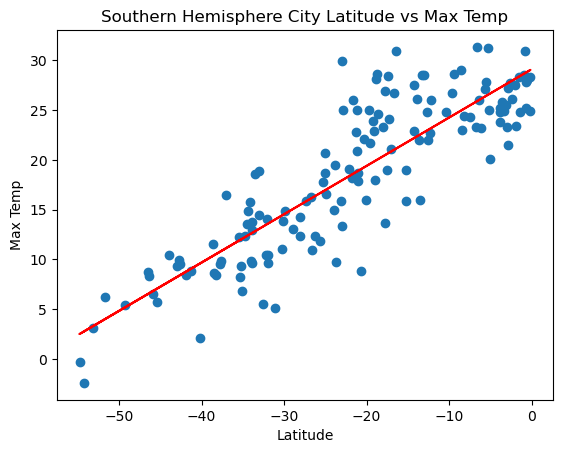

In [18]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere City Latitude vs Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:

The correlation between latitude and maximum temperature in the random cities in the Northern Hemisphere is moderate (r value of 0.4145797845462045), with lower latitude being associated with higher temperatures. On the other hand, the relationship between latitude and maximum temperature in the random cities in the Southern Hemisphere,have a stronger correlation with an r value of 0.7076332760559709.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0009041741919392105


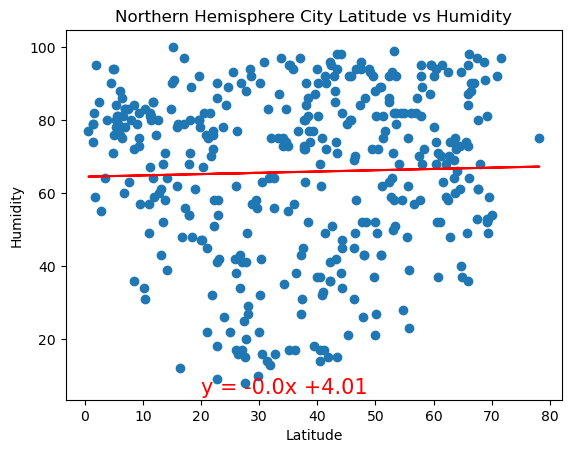

In [19]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere City Latitude vs Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00047065949562420445


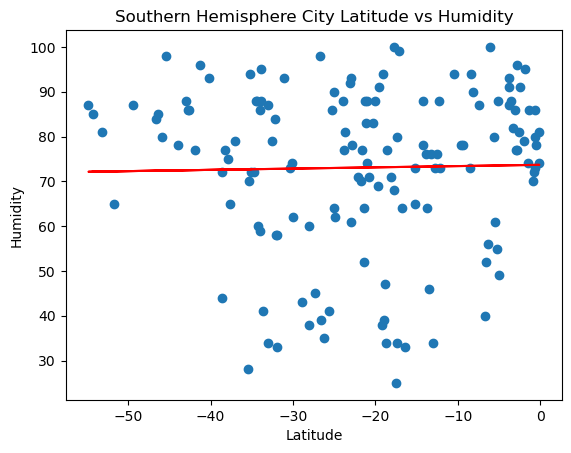

In [20]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere City Latitude vs Humidity')

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:

In the dataset, there is a weak correlation between city latitude and humidity in both the Northern Hemisphere (r-value of 
0.002352407210381003) and Southern Hemisphere (r-value of 0.005812621713510823).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00027211734701460265


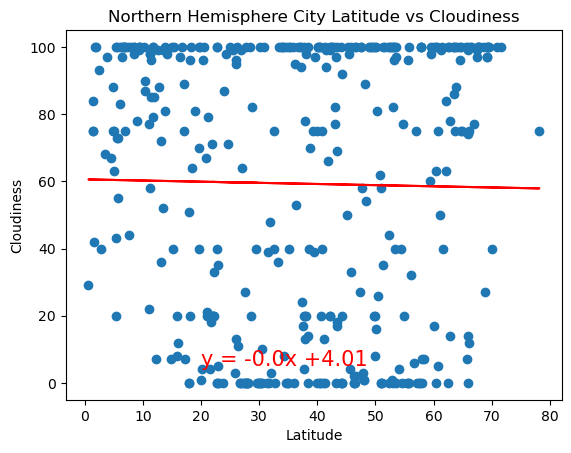

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere City Latitude vs Cloudiness")

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.001387006410647877


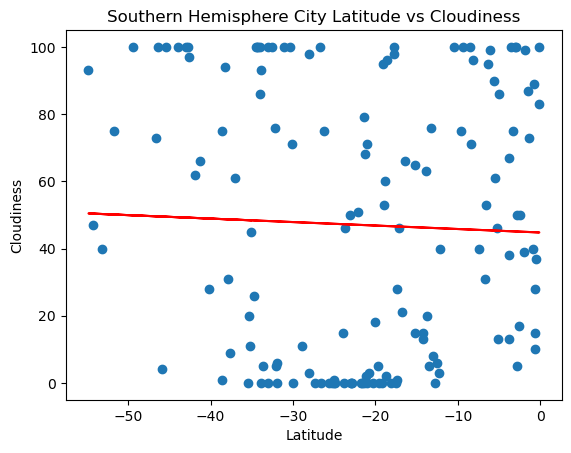

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere City Latitude vs Cloudiness")

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**

In the dataset, there is a weak correlation between city latitude and cloudiness in both the Northern Hemisphere (r-value of 0.006801779951429569) and Southern Hemisphere (r-value of 0.0003711598480122185).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012050392270112502


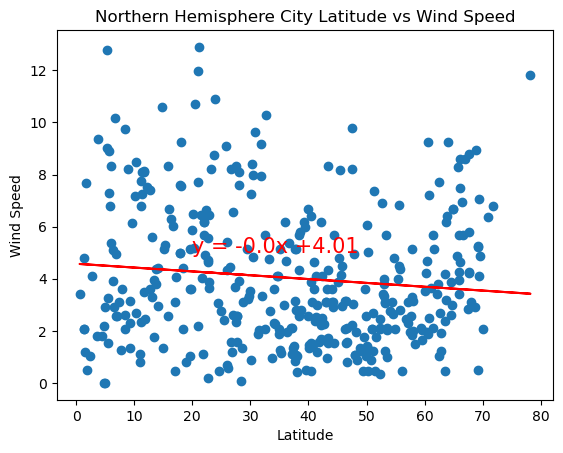

In [23]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere City Latitude vs Wind Speed")

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.012050392270112502


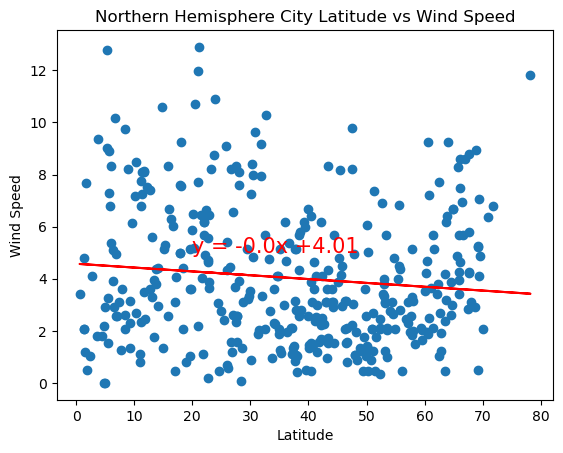

In [24]:
# Southern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere City Latitude vs Wind Speed")

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

In the dataset, there is a weak correlation between city latitude and wind speed in both the Northern Hemisphere (r-value of 
0.017949777933903278) and Southern Hemisphere (r-value of 0.007782370443394432).